# Import of Python libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

# Import data

In [7]:
data = pd.read_csv("../1. Task and Data/train.csv", sep="|")

data2 = pd.read_csv("../1. Task and Data/test.csv", sep = "|")

# Initial data exploration

In [8]:
data.shape

(1879, 10)

In [9]:
data['trustLevel'] = data['trustLevel'].astype('category')
data.dtypes

trustLevel                   category
totalScanTimeInSeconds          int64
grandTotal                    float64
lineItemVoids                   int64
scansWithoutRegistration        int64
quantityModifications           int64
scannedLineItemsPerSecond     float64
valuePerSecond                float64
lineItemVoidsPerPosition      float64
fraud                           int64
dtype: object

Almost only numeric data -> Discretization might be necessary for some models

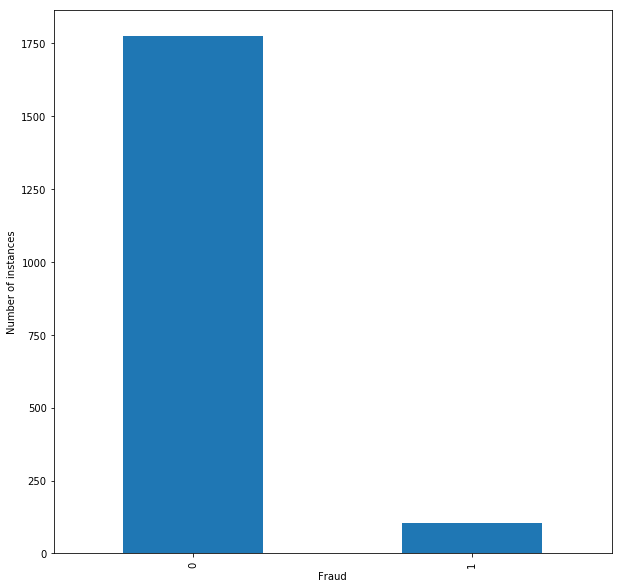

In [10]:
data.fraud.value_counts().plot.bar()
plt.xlabel('Fraud')
plt.ylabel('Number of instances')
plt.savefig('Fraud Distribution.jpg')

Text(0, 0.5, 'Number of Instances')

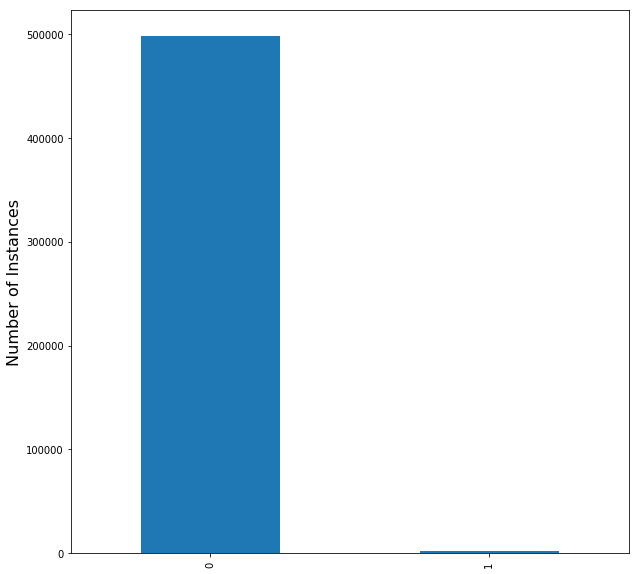

In [11]:
df = data.fraud.value_counts()

df[0] = len(data2)
df[1] = len(data)



# df.set_index(['Test Data Set', 'Train Data Set'])

df.plot.bar()
plt.ylabel('Number of Instances',fontsize=16)
#plt.bar([[len(data2), len(data)]], height = 1)

# plt.bar([len(data2)], height = 500000)

Only 104 frauds out of 1879 instances -> Unbalanced target distribution that needs to be considered during training (e.g., use stratification)

In [5]:
data.isnull().values.any()

False

There are no NULL values in the data
-> no imputation is needed

# Feature Engineering - What information is "hidden" in the data

In [100]:
data['totalScanTimeInMinutes'] = data['totalScanTimeInSeconds'] / 60.0
data['scannedLineItems'] = data['scannedLineItemsPerSecond'] * data['totalScanTimeInSeconds']
data['pricePerScannedLineItem'] = data['grandTotal'] / data['scannedLineItems']
data['scansWithoutRegistrationPerScannedLineItem'] = data['scansWithoutRegistration'] / data['scannedLineItems']
data['quantityModificationsPerScannedLineItem'] = data['quantityModifications'] / data['scannedLineItems']
data['lineItemVoidsPerSecond'] = data['lineItemVoids'] / data['totalScanTimeInSeconds']
data['scansWithoutRegistrationPerSecond'] = data['scansWithoutRegistration'] / data['totalScanTimeInSeconds']
data['quantityModificationsPerSecond'] = data['quantityModifications'] / data['totalScanTimeInSeconds']
data['secondsPerEuro'] = data['totalScanTimeInSeconds'] / data['grandTotal']
data['lineItemVoidsPerEuro'] = data['lineItemVoids'] / data['grandTotal']
data['scansWithoutRegistrationPerEuro'] = data['scansWithoutRegistration'] / data['grandTotal']
data['quantityModificationsPerEuro'] = data['quantityModifications'] / data['grandTotal']

important notes:
- totalScanTimeInMinutes is just another represetation of the original attribute totalScanTimeInSeconds
- secondsPerEuro is just the inverse of the original feature valuePerSecond, but it might have a more natural interpretation
- the original feature lineItemVoidsPerPosition means lineItemVoidsPerScannedLineItem


result of the analysis of the test data set:
- you have to be very careful with the perEuro attributes because in the test data that we have to predict there are some instances with a grandTotal of 0.00 which would result in a division by zero error when trying to compute this feature 

# Overview over all columns

In [101]:
data.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,...,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349,...,7.067227,0.681185,0.358495,0.022530,0.020324,0.010429,153.435326,1.053188,0.825982,0.183389
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720,...,12.198532,1.205101,0.669294,0.132777,0.136699,0.063322,3477.973838,23.989756,18.910695,1.699509
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000,...,0.001111,0.000000,0.000000,0.000000,0.000000,0.000000,0.026406,0.000000,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000,...,1.680123,0.142857,0.066667,0.002585,0.002314,0.001102,9.318717,0.048948,0.042703,0.020189
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000,...,3.313000,0.333333,0.166667,0.005797,0.005263,0.002671,18.349359,0.105362,0.095724,0.050120
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000,...,6.532444,0.630682,0.333333,0.011554,0.010759,0.005329,35.988238,0.212756,0.192697,0.100218
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000,...,95.580000,10.000000,5.000000,3.000000,4.500000,2.000000,147300.000000,1000.000000,800.000000,66.666667


In general, there are only 7 different features for fraud detection:
  - trustLevel
  - totalScanTimeInSeconds
  - grandTotal
  - scannedLineItems (had to be calculated)
  - lineItemVoids
  - scansWithoutRegistration
  - quantityModifications
    
All other columns represent relationships between this features such as pricePerScannedLineItem or scannedLineItemsPerSecond

The attributes have significantly different ranges -> normalization might be necessary for some models

# Relationships and Correlation between attributes

In [62]:
data.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,...,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
trustLevel,1.000000,0.025264,0.047656,-0.017312,0.017296,0.006506,0.030701,0.027626,0.009241,-0.319765,...,0.008270,0.004769,0.001516,0.012482,-0.015424,-0.014283,0.034538,0.041714,0.038773,0.024926
totalScanTimeInSeconds,0.025264,1.000000,-0.001230,0.019068,0.009066,-0.011415,-0.262988,-0.208450,-0.011623,0.110414,...,-0.019434,-0.021238,-0.028598,-0.220757,-0.193850,-0.214473,0.031677,0.016433,0.019060,-0.030811
grandTotal,0.047656,-0.001230,1.000000,0.006321,-0.030573,-0.008163,-0.011885,0.075679,-0.008858,0.001421,...,0.328316,0.003583,-0.004884,-0.005339,-0.029798,0.000659,-0.068313,-0.069318,-0.067842,-0.138385
lineItemVoids,-0.017312,0.019068,0.006321,1.000000,-0.017023,-0.007173,-0.004438,0.005114,0.346514,0.063496,...,-0.025732,-0.014101,-0.016196,0.094364,0.007128,0.000081,0.029287,0.043027,0.030960,0.019257
scansWithoutRegistration,0.017296,0.009066,-0.030573,-0.017023,1.000000,0.018961,-0.024126,-0.018844,0.002834,0.074123,...,0.002975,0.346238,0.003962,0.009702,0.092702,0.016191,0.019099,0.018232,0.029752,-0.007120
quantityModifications,0.006506,-0.011415,-0.008163,-0.007173,0.018961,1.000000,-0.014880,0.010548,0.018318,-0.000864,...,0.014195,0.022659,0.368689,0.000753,0.013118,0.111004,-0.041445,-0.037970,-0.038209,0.038346
scannedLineItemsPerSecond,0.030701,-0.262988,-0.011885,-0.004438,-0.024126,-0.014880,1.000000,0.692152,-0.056316,-0.023085,...,-0.061587,-0.057469,-0.055892,0.653202,0.484715,0.465130,-0.007087,-0.004389,-0.004443,0.001078
valuePerSecond,0.027626,-0.208450,0.075679,0.005114,-0.018844,0.010548,0.692152,1.000000,0.019886,-0.028873,...,0.033083,0.038250,0.040377,0.863587,0.578365,0.729389,-0.006938,-0.006378,-0.006232,-0.012593
lineItemVoidsPerPosition,0.009241,-0.011623,-0.008858,0.346514,0.002834,0.018318,-0.056316,0.019886,1.000000,-0.090116,...,0.610629,0.634480,0.616196,0.061248,0.059466,0.059548,0.005240,0.008308,0.004678,-0.012042
fraud,-0.319765,0.110414,0.001421,0.063496,0.074123,-0.000864,-0.023085,-0.028873,-0.090116,1.000000,...,-0.100765,-0.090615,-0.094393,-0.026932,-0.022587,-0.028360,-0.006014,-0.003501,-0.003817,0.011218


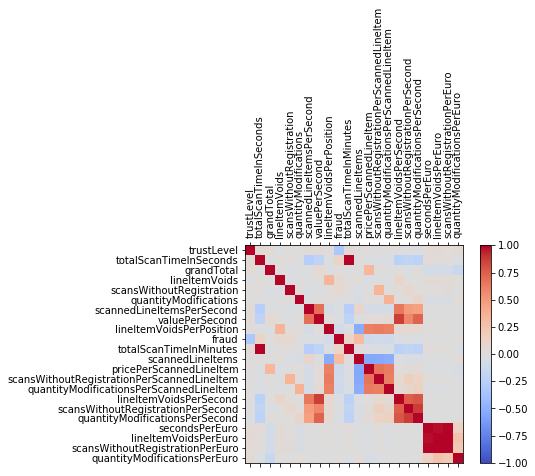

In [63]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

# Check for outliers - Check the 30 largest and smallest values

In [102]:
df = pd.DataFrame(pd.concat([data['trustLevel'].sort_values(ascending = False)[:30].reset_index(drop=True), data['trustLevel'].sort_values(ascending = True)[:30].reset_index(drop=True)], axis=1))
df.columns = ["trustLevel - Largest Values", "trustLevel - Smallest Values"]
df

,trustLevel - Largest Values,trustLevel - Smallest Values
0,6,1
1,6,1
2,6,1
3,6,1
4,6,1
5,6,1
6,6,1
7,6,1
8,6,1
9,6,1


In [103]:
df = pd.DataFrame(pd.concat([data['totalScanTimeInSeconds'].sort_values(ascending = False)[:30].reset_index(drop=True), data['totalScanTimeInSeconds'].sort_values(ascending = True)[:30].reset_index(drop=True)], axis=1))
df.columns = ["totalScanTimeInSeconds - Largest Values", "totalScanTimeInSeconds - Smallest Values"]
df

,totalScanTimeInSeconds - Largest Values,totalScanTimeInSeconds - Smallest Values
0,1831,2
1,1830,2
2,1830,3
3,1829,3
4,1829,4
5,1829,4
6,1827,6
7,1826,9
8,1826,9
9,1825,9


There are some very short scan times

In [104]:
df = pd.DataFrame(pd.concat([data['grandTotal'].sort_values(ascending = False)[:30].reset_index(drop=True), data['grandTotal'].sort_values(ascending = True)[:30].reset_index(drop=True)], axis=1))
df.columns = ["grandTotal - Largest Values", "grandTotal - Smallest Values"]
df

,grandTotal - Largest Values,grandTotal - Smallest Values
0,99.96,0.01
1,99.82,0.03
2,99.76,0.07
3,99.76,0.14
4,99.75,0.16
5,99.73,0.23
6,99.70,0.26
7,99.68,0.28
8,99.64,0.45
9,99.63,0.54


There are some very cheap purchases and 100 seems to be an upper bound 

In [62]:
df = pd.DataFrame(pd.concat([data['scannedLineItems'].sort_values(ascending = False)[:30].reset_index(drop=True), data['scannedLineItems'].sort_values(ascending = True)[:30].reset_index(drop=True)], axis=1))
df.columns = ["scannedLineItems - Largest Values", "scannedLineItems - Smallest Values"]
df

,scannedLineItems - Largest Values,scannedLineItems - Smallest Values
0,30.0,1.0
1,30.0,1.0
2,30.0,1.0
3,30.0,1.0
4,30.0,1.0
5,30.0,1.0
6,30.0,1.0
7,30.0,1.0
8,30.0,1.0
9,30.0,1.0


not more than 30 items purchased

In [63]:
df = pd.DataFrame(pd.concat([data['lineItemVoids'].sort_values(ascending = False)[:30].reset_index(drop=True), data['lineItemVoids'].sort_values(ascending = True)[:30].reset_index(drop=True)], axis=1))
df.columns = ["lineItemVoids - Largest Values", "lineItemVoids - Smallest Values"]
df

,lineItemVoids - Largest Values,lineItemVoids - Smallest Values
0,11,0
1,11,0
2,11,0
3,11,0
4,11,0
5,11,0
6,11,0
7,11,0
8,11,0
9,11,0


In [67]:
df = pd.DataFrame(pd.concat([data['scansWithoutRegistration'].sort_values(ascending = False)[:30].reset_index(drop=True), data['scansWithoutRegistration'].sort_values(ascending = True)[:30].reset_index(drop=True)], axis=1))
df.columns = ["scansWithoutRegistration - Largest Values", "scansWithoutRegistration - Smallest Values"]
df

,scansWithoutRegistration - Largest Values,scansWithoutRegistration - Smallest Values
0,10,0
1,10,0
2,10,0
3,10,0
4,10,0
5,10,0
6,10,0
7,10,0
8,10,0
9,10,0


In [68]:
df = pd.DataFrame(pd.concat([data['quantityModifications'].sort_values(ascending = False)[:30].reset_index(drop=True), data['quantityModifications'].sort_values(ascending = True)[:30].reset_index(drop=True)], axis=1))
df.columns = ["quantityModifications - Largest Values", "quantityModifications - Smallest Values"]
df

,quantityModifications - Largest Values,quantityModifications - Smallest Values
0,5,0
1,5,0
2,5,0
3,5,0
4,5,0
5,5,0
6,5,0
7,5,0
8,5,0
9,5,0


In [69]:
df = pd.DataFrame(pd.concat([data['scannedLineItemsPerSecond'].sort_values(ascending = False)[:30].reset_index(drop=True), data['scannedLineItemsPerSecond'].sort_values(ascending = True)[:30].reset_index(drop=True)], axis=1))
df.columns = ["scannedLineItemsPerSecond - Largest Values", "scannedLineItemsPerSecond - Smallest Values"]
df

,scannedLineItemsPerSecond - Largest Values,scannedLineItemsPerSecond - Smallest Values
0,6.666667,0.000548
1,4.833333,0.000551
2,4.666667,0.000558
3,4.000000,0.000589
4,2.181818,0.000603
5,2.111111,0.000604
6,2.000000,0.000604
7,1.611111,0.000606
8,1.500000,0.000624
9,1.500000,0.000624


Are those high values realistic? Maybe, if you consider quantity modifications and the fact that the scan time ranges from the first to the last scanning process (not when you walk in the store)

In [70]:
df = pd.DataFrame(pd.concat([data['valuePerSecond'].sort_values(ascending = False)[:30].reset_index(drop=True), data['valuePerSecond'].sort_values(ascending = True)[:30].reset_index(drop=True)], axis=1))
df.columns = ["valuePerSecond - Largest Values", "valuePerSecond - Smallest Values"]
df

,valuePerSecond - Largest Values,valuePerSecond - Smallest Values
0,37.870000,0.000007
1,21.646667,0.000044
2,17.035000,0.000045
3,14.053333,0.000209
4,13.412500,0.000324
5,8.196667,0.000525
6,7.241818,0.000544
7,6.892500,0.000551
8,5.690769,0.000609
9,4.458889,0.000661


In [71]:
df = pd.DataFrame(pd.concat([data['lineItemVoidsPerPosition'].sort_values(ascending = False)[:30].reset_index(drop=True), data['lineItemVoidsPerPosition'].sort_values(ascending = True)[:30].reset_index(drop=True)], axis=1))
df.columns = ["lineItemVoidsPerPosition - Largest Values", "lineItemVoidsPerPosition - Smallest Values"]
df

,lineItemVoidsPerPosition - Largest Values,lineItemVoidsPerPosition - Smallest Values
0,11.0,0.0
1,10.0,0.0
2,10.0,0.0
3,10.0,0.0
4,10.0,0.0
5,10.0,0.0
6,10.0,0.0
7,10.0,0.0
8,10.0,0.0
9,10.0,0.0


# Class-Dependent Distribution of attributes

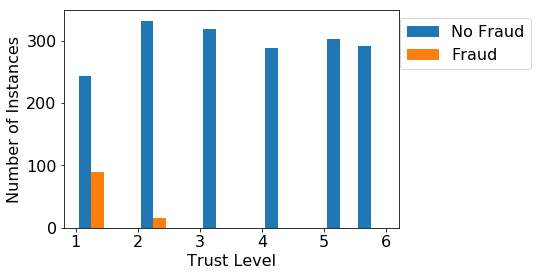

In [115]:
x1 = list(data[data['fraud'] == 0]['trustLevel'])
x2 = list(data[data['fraud'] == 1]['trustLevel'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Trust Level',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Trust Level Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,3.596154,1.144231
std,1.720912,0.353025
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,1.000000
75%,5.000000,1.000000
max,6.000000,2.000000


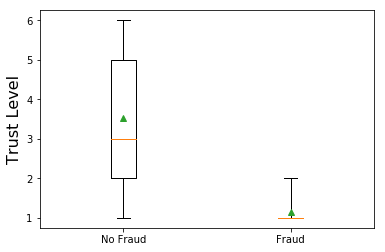

In [79]:
x1 = list(data[data['fraud'] == 0]['trustLevel'])
x2 = list(data[data['fraud'] == 1]['trustLevel'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names,  whis='range', showmeans=True)
plt.ylabel('Trust Level' ,fontsize=16)
#plt.savefig('Trust Level Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

TrustLevel as a very heplful indicator for fraud. Fraud only appears for trustLevels below 2.5, everything above is classified non-fraudulent. 

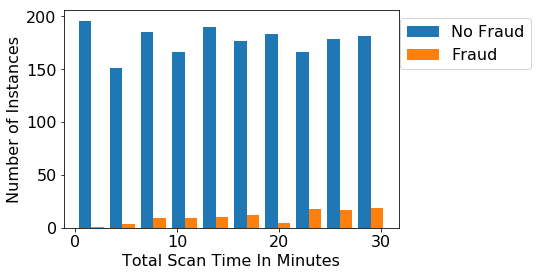

In [113]:
x1 = list(data[data['fraud'] == 0]['totalScanTimeInMinutes'])
x2 = list(data[data['fraud'] == 1]['totalScanTimeInMinutes'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Total Scan Time In Minutes',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Total Scan Time In Minutes Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,16.532853,19.565224
std,9.060014,7.854348
min,0.266667,1.516667
25%,9.095833,13.650000
50%,16.916667,21.825000
75%,24.687500,25.675000
max,30.333333,30.500000


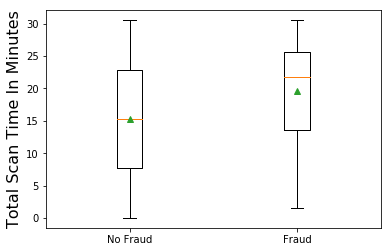

In [78]:
x1 = list(data[data['fraud'] == 0]['totalScanTimeInMinutes'])
x2 = list(data[data['fraud'] == 1]['totalScanTimeInMinutes'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names,  whis='range', showmeans=True)
plt.ylabel('Total Scan Time In Minutes' ,fontsize=16)
#plt.savefig('Trust Level Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

Fraudulant cases to have longer scan times, short scan times are a good indicator for non-fraudulent activity

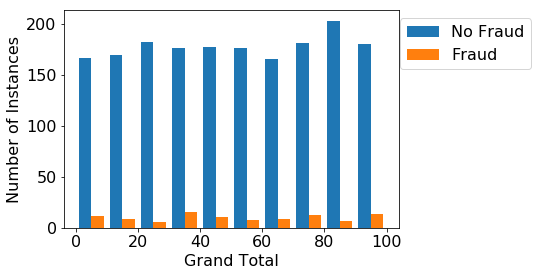

In [111]:
x1 = list(data[data['fraud'] == 0]['grandTotal'])
x2 = list(data[data['fraud'] == 1]['grandTotal'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Grand Total',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Grand Total Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,48.355962,51.034327
std,28.356628,30.298933
min,0.280000,0.260000
25%,24.150000,27.072500
50%,48.380000,48.670000
75%,71.042500,76.862500
max,99.580000,99.820000


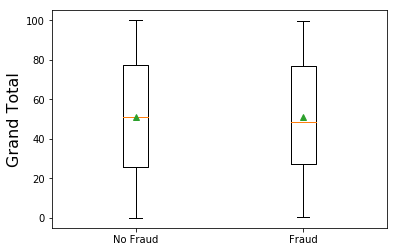

In [77]:
x1 = list(data[data['fraud'] == 0]['grandTotal'])
x2 = list(data[data['fraud'] == 1]['grandTotal'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names,  whis='range', showmeans=True)
plt.ylabel('Grand Total' ,fontsize=16)
#plt.savefig('Trust Level Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

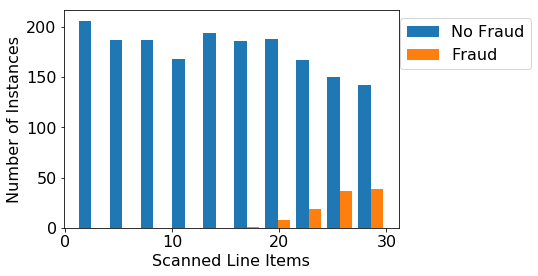

In [109]:
x1 = list(data[data['fraud'] == 0]['scannedLineItems'])
x2 = list(data[data['fraud'] == 1]['scannedLineItems'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Scanned Line Items',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Scanned Line Items Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,15.538462,26.115385
std,8.071192,2.986402
min,1.000000,18.000000
25%,9.000000,24.000000
50%,15.000000,27.000000
75%,22.000000,28.000000
max,30.000000,30.000000


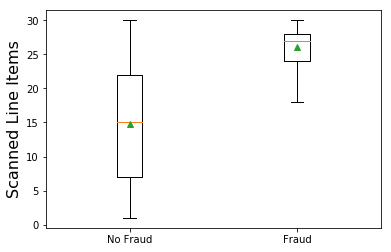

In [76]:
x1 = list(data[data['fraud'] == 0]['scannedLineItems'])
x2 = list(data[data['fraud'] == 1]['scannedLineItems'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Scanned Line Items' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

-> Fraudulent items have more scanned line items (on average, 10 items more)

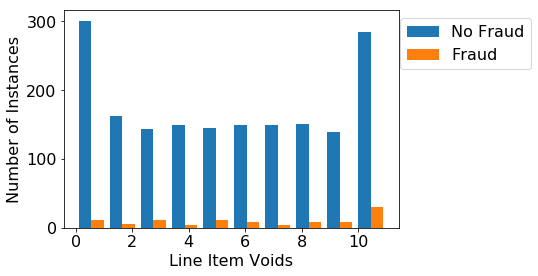

In [118]:
x1 = list(data[data['fraud'] == 0]['lineItemVoids'])
x2 = list(data[data['fraud'] == 1]['lineItemVoids'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Line Item Voids',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Line Item Voids Fraud Distribution.jpg')

interesting concentration of extreme cases for the non-fraudulent cases

,No Fraud,Fraud
count,104.000000,104.000000
mean,5.057692,6.375000
std,3.305855,3.498092
min,0.000000,0.000000
25%,2.000000,3.000000
50%,5.000000,6.000000
75%,7.000000,10.000000
max,11.000000,11.000000


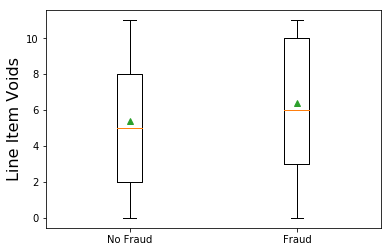

In [75]:
x1 = list(data[data['fraud'] == 0]['lineItemVoids'])
x2 = list(data[data['fraud'] == 1]['lineItemVoids'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Line Item Voids' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

fraudulent instances have more line item voids on average

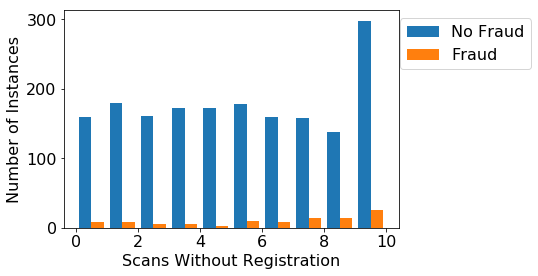

In [121]:
x1 = list(data[data['fraud'] == 0]['scansWithoutRegistration'])
x2 = list(data[data['fraud'] == 1]['scansWithoutRegistration'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Scans Without Registration',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Scans Without Registration Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,4.778846,5.865385
std,3.401761,3.211199
min,0.000000,0.000000
25%,2.000000,3.000000
50%,5.000000,7.000000
75%,8.000000,8.250000
max,10.000000,10.000000


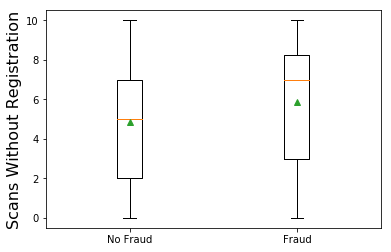

In [74]:
x1 = list(data[data['fraud'] == 0]['scansWithoutRegistration'])
x2 = list(data[data['fraud'] == 1]['scansWithoutRegistration'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Scans Without Registration' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

fraudulent instances have more scans without registration on average

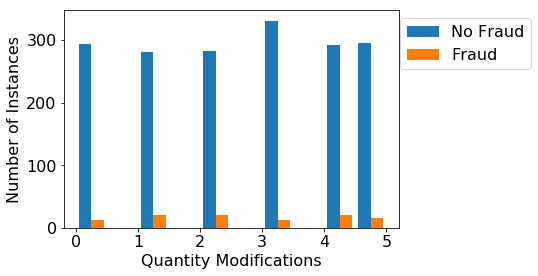

In [184]:
x1 = list(data[data['fraud'] == 0]['quantityModifications'])
x2 = list(data[data['fraud'] == 1]['quantityModifications'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Quantity Modifications',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Quantity Modifications Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,2.596154,2.519231
std,1.686723,1.654536
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,4.000000
max,5.000000,5.000000


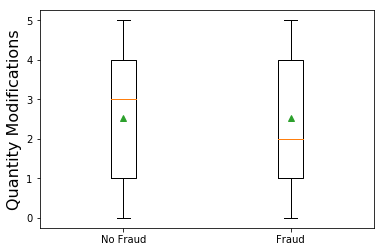

In [73]:
x1 = list(data[data['fraud'] == 0]['quantityModifications'])
x2 = list(data[data['fraud'] == 1]['quantityModifications'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Quantity Modifications' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

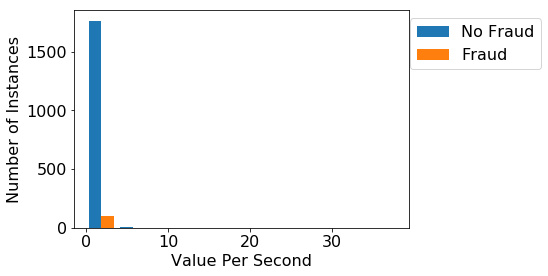

In [128]:
x1 = list(data[data['fraud'] == 0]['valuePerSecond'])
x2 = list(data[data['fraud'] == 1]['valuePerSecond'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Value Per Second',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Value Per Second Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.127228,0.053622
std,0.288127,0.045918
min,0.000525,0.000661
25%,0.026954,0.026209
50%,0.048351,0.043697
75%,0.107397,0.071838
max,2.018125,0.230802


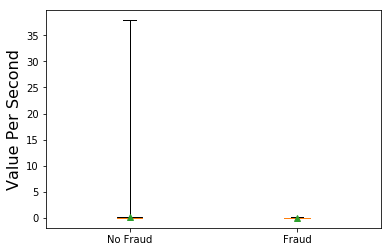

In [80]:
x1 = list(data[data['fraud'] == 0]['valuePerSecond'])
x2 = list(data[data['fraud'] == 1]['valuePerSecond'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Value Per Second' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

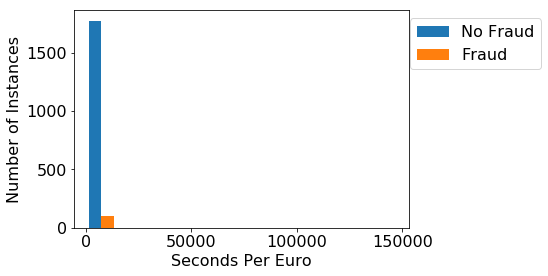

In [131]:
x1 = list(data[data['fraud'] == 0]['secondsPerEuro'])
x2 = list(data[data['fraud'] == 1]['secondsPerEuro'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Seconds Per Euro',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Seconds Per Euro Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,81.889744,67.048587
std,259.472459,167.368188
min,0.495509,4.332720
25%,9.319655,13.920334
50%,20.698866,22.884669
75%,37.100447,38.180550
max,1903.571429,1513.750000


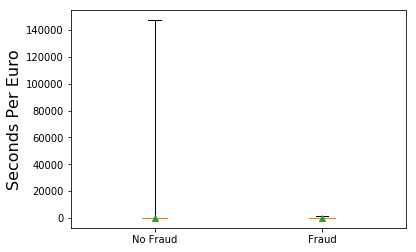

In [81]:
x1 = list(data[data['fraud'] == 0]['secondsPerEuro'])
x2 = list(data[data['fraud'] == 1]['secondsPerEuro'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Seconds Per Euro' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

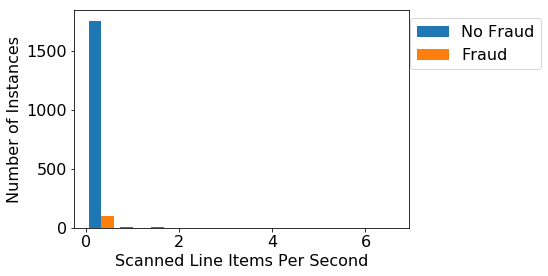

In [129]:
x1 = list(data[data['fraud'] == 0]['scannedLineItemsPerSecond'])
x2 = list(data[data['fraud'] == 1]['scannedLineItemsPerSecond'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Scanned Line Items Per Second',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Scanned Line Items Per Second Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.045854,0.031582
std,0.153991,0.034298
min,0.001274,0.011692
25%,0.009027,0.016411
50%,0.014364,0.020436
75%,0.027525,0.033966
max,1.500000,0.307692


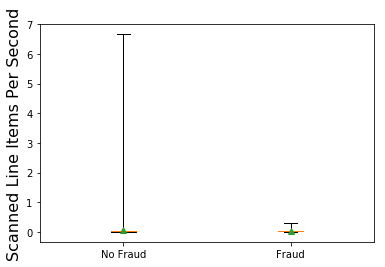

In [82]:
x1 = list(data[data['fraud'] == 0]['scannedLineItemsPerSecond'])
x2 = list(data[data['fraud'] == 1]['scannedLineItemsPerSecond'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Scanned Line Items Per Second' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

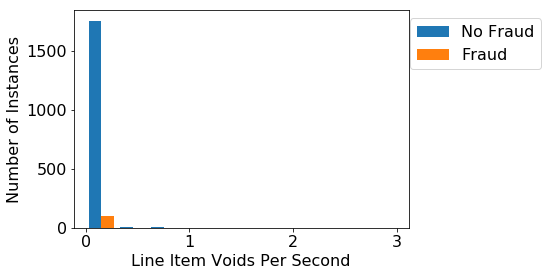

In [133]:
x1 = list(data[data['fraud'] == 0]['lineItemVoidsPerSecond'])
x2 = list(data[data['fraud'] == 1]['lineItemVoidsPerSecond'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Line Item Voids Per Second',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Line Item Voids Per Second Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.010806,0.007761
std,0.019285,0.010282
min,0.000000,0.000000
25%,0.002545,0.002789
50%,0.005291,0.005391
75%,0.009882,0.008667
max,0.125000,0.087912


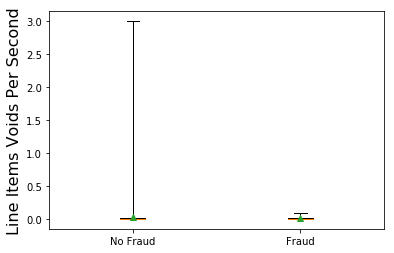

In [83]:
x1 = list(data[data['fraud'] == 0]['lineItemVoidsPerSecond'])
x2 = list(data[data['fraud'] == 1]['lineItemVoidsPerSecond'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Line Items Voids Per Second' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

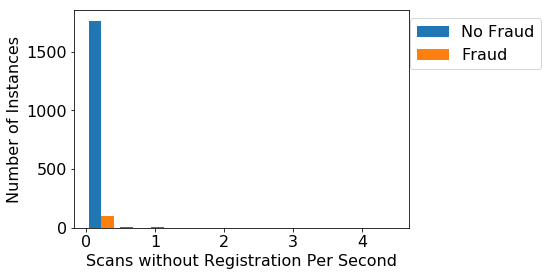

In [139]:
x1 = list(data[data['fraud'] == 0]['scansWithoutRegistrationPerSecond'])
x2 = list(data[data['fraud'] == 1]['scansWithoutRegistrationPerSecond'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Scans without Registration Per Second',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Scans without Registration Per Second Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.011029,0.007572
std,0.025407,0.009611
min,0.000000,0.000000
25%,0.001972,0.002643
50%,0.005215,0.005220
75%,0.009486,0.008755
max,0.227273,0.065934


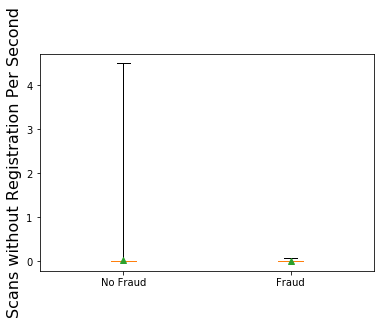

In [84]:
x1 = list(data[data['fraud'] == 0]['scansWithoutRegistrationPerSecond'])
x2 = list(data[data['fraud'] == 1]['scansWithoutRegistrationPerSecond'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Scans without Registration Per Second' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

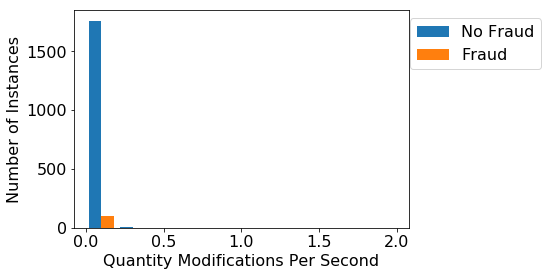

In [140]:
x1 = list(data[data['fraud'] == 0]['quantityModificationsPerSecond'])
x2 = list(data[data['fraud'] == 1]['quantityModificationsPerSecond'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Quantity Modifications Per Second',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Quantity Modifications Per Second Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.009033,0.003012
std,0.032062,0.004776
min,0.000000,0.000000
25%,0.001176,0.000923
50%,0.002450,0.002326
75%,0.004840,0.003352
max,0.312500,0.043956


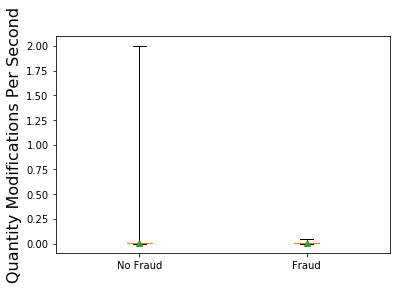

In [85]:
x1 = list(data[data['fraud'] == 0]['quantityModificationsPerSecond'])
x2 = list(data[data['fraud'] == 1]['quantityModificationsPerSecond'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Quantity Modifications Per Second' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

Non fraudulent instances have a three times higher quantity modifications per second rate

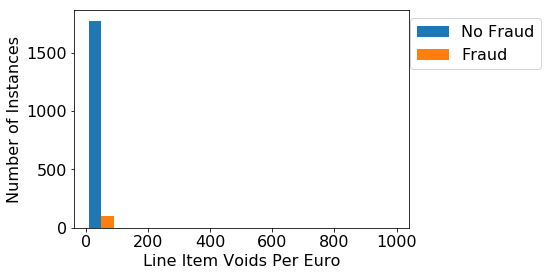

In [143]:
x1 = list(data[data['fraud'] == 0]['lineItemVoidsPerEuro'])
x2 = list(data[data['fraud'] == 1]['lineItemVoidsPerEuro'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Line Item Voids Per Euro',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Line Item Voids Per Euro Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.557051,0.706325
std,2.486694,3.255205
min,0.000000,0.000000
25%,0.039834,0.075511
50%,0.110302,0.117902
75%,0.239428,0.228913
max,21.428571,30.769231


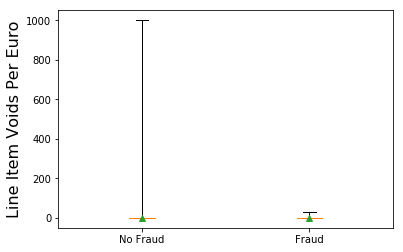

In [87]:
x1 = list(data[data['fraud'] == 0]['lineItemVoidsPerEuro'])
x2 = list(data[data['fraud'] == 1]['lineItemVoidsPerEuro'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Line Item Voids Per Euro' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

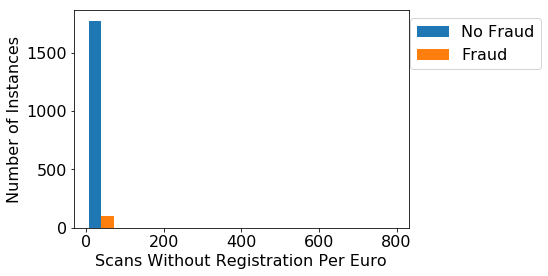

In [189]:
x1 = list(data[data['fraud'] == 0]['scansWithoutRegistrationPerEuro'])
x2 = list(data[data['fraud'] == 1]['scansWithoutRegistrationPerEuro'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Scans Without Registration Per Euro',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Scans Without Registration Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.280820,0.527822
std,0.886350,2.325907
min,0.000000,0.000000
25%,0.032171,0.065831
50%,0.096345,0.117506
75%,0.221034,0.231903
max,8.620690,23.076923


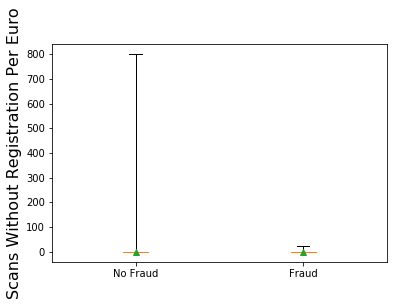

In [88]:
x1 = list(data[data['fraud'] == 0]['scansWithoutRegistrationPerEuro'])
x2 = list(data[data['fraud'] == 1]['scansWithoutRegistrationPerEuro'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Scans Without Registration Per Euro' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

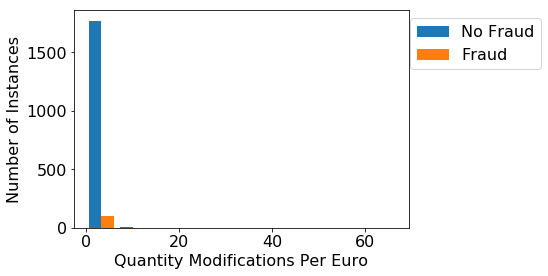

In [191]:
x1 = list(data[data['fraud'] == 0]['quantityModificationsPerEuro'])
x2 = list(data[data['fraud'] == 1]['quantityModificationsPerEuro'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Quantity Modifications Per Euro',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Quantity Modifications Per Euro Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.180396,0.262128
std,0.724307,1.516600
min,0.000000,0.000000
25%,0.021499,0.020397
50%,0.051484,0.045356
75%,0.099196,0.116343
max,7.142857,15.384615


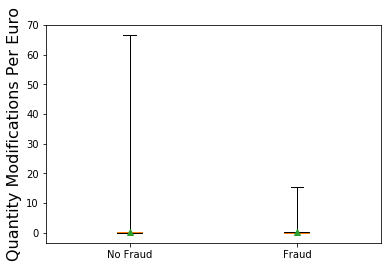

In [89]:
x1 = list(data[data['fraud'] == 0]['quantityModificationsPerEuro'])
x2 = list(data[data['fraud'] == 1]['quantityModificationsPerEuro'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Quantity Modifications Per Euro' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

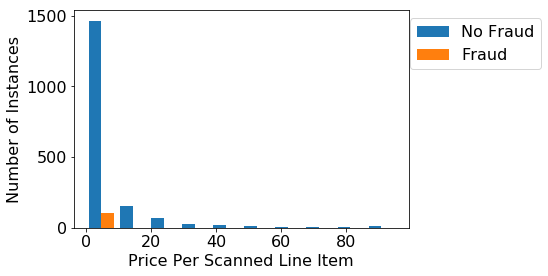

In [193]:
x1 = list(data[data['fraud'] == 0]['pricePerScannedLineItem'])
x2 = list(data[data['fraud'] == 1]['pricePerScannedLineItem'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Price Per Scanned Line Item',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Price Per Scanned Line Item Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,6.001386,1.990506
std,12.059074,1.214497
min,0.036250,0.009286
25%,1.507315,0.957556
50%,2.884800,1.802756
75%,5.415096,3.099950
max,90.730000,4.733158


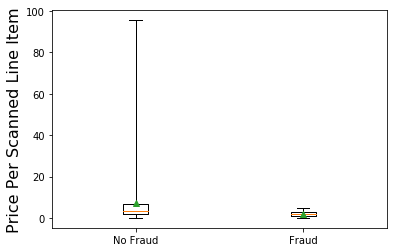

In [90]:
x1 = list(data[data['fraud'] == 0]['pricePerScannedLineItem'])
x2 = list(data[data['fraud'] == 1]['pricePerScannedLineItem'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Price Per Scanned Line Item' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

The price per line item is significantly smaller for fraudulent instances

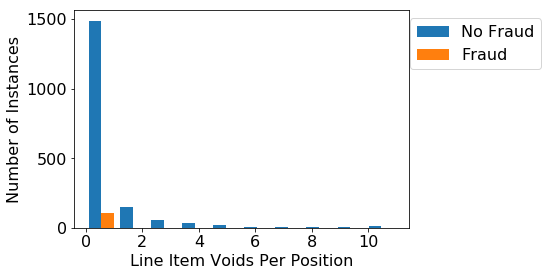

In [195]:
x1 = list(data[data['fraud'] == 0]['lineItemVoidsPerPosition'])
x2 = list(data[data['fraud'] == 1]['lineItemVoidsPerPosition'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Line Item Voids Per Position',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Line Item Voids Per Position Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.542937,0.251412
std,0.812978,0.146440
min,0.000000,0.000000
25%,0.146825,0.130435
50%,0.333333,0.245000
75%,0.526190,0.379721
max,5.000000,0.578947


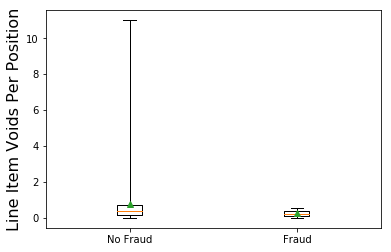

In [91]:
x1 = list(data[data['fraud'] == 0]['lineItemVoidsPerPosition'])
x2 = list(data[data['fraud'] == 1]['lineItemVoidsPerPosition'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Line Item Voids Per Position' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

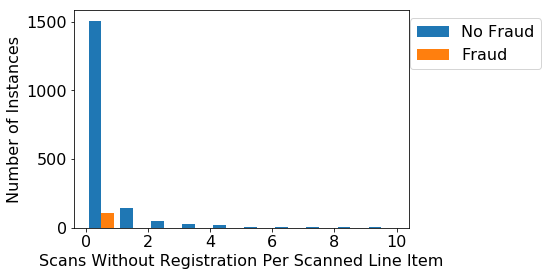

In [197]:
x1 = list(data[data['fraud'] == 0]['scansWithoutRegistrationPerScannedLineItem'])
x2 = list(data[data['fraud'] == 1]['scansWithoutRegistrationPerScannedLineItem'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Scans Without Registration Per Scanned Line Item',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Scans Without Registration Per Scanned Line Item Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.607343,0.230172
std,0.977808,0.130738
min,0.000000,0.000000
25%,0.104809,0.123750
50%,0.296250,0.240690
75%,0.625000,0.336207
max,5.000000,0.450000


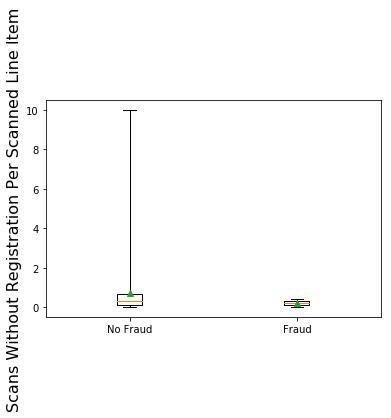

In [92]:
x1 = list(data[data['fraud'] == 0]['scansWithoutRegistrationPerScannedLineItem'])
x2 = list(data[data['fraud'] == 1]['scansWithoutRegistrationPerScannedLineItem'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Scans Without Registration Per Scanned Line Item' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()

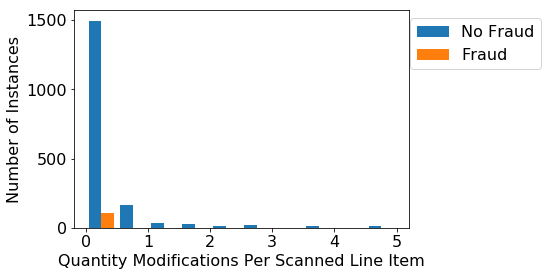

In [199]:
x1 = list(data[data['fraud'] == 0]['quantityModificationsPerScannedLineItem'])
x2 = list(data[data['fraud'] == 1]['quantityModificationsPerScannedLineItem'])
names = ['No Fraud', 'Fraud']
plt.hist([x1, x2], label=names)
plt.legend(loc='best', bbox_to_anchor=(0.92, 0., 0.5, 1),fontsize=16)
plt.xlabel('Quantity Modifications Per Scanned Line Item',fontsize=16)
plt.ylabel('Number of Instances',fontsize=16)
plt.savefig('Quantity Modifications Per Scanned Line Item Fraud Distribution.jpg')

,No Fraud,Fraud
count,104.000000,104.000000
mean,0.364445,0.097565
std,0.707482,0.066162
min,0.000000,0.000000
25%,0.070238,0.038462
50%,0.184659,0.085145
75%,0.308333,0.148148
max,5.000000,0.263158


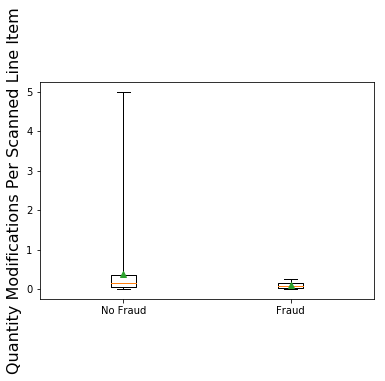

In [93]:
x1 = list(data[data['fraud'] == 0]['quantityModificationsPerScannedLineItem'])
x2 = list(data[data['fraud'] == 1]['quantityModificationsPerScannedLineItem'])
names = ['No Fraud', 'Fraud']
plt.boxplot([x1, x2], labels=names, whis='range', showmeans=True)
plt.ylabel('Quantity Modifications Per Scanned Line Item' ,fontsize=16)
#plt.savefig('Scanned Line Items Fraud Distribution.jpg')
pd.DataFrame(list(zip(x1, x2)), columns  = ['No Fraud', 'Fraud']).describe()